In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from aif360.algorithms.inprocessing import PrejudiceRemover
from methods.data.individual_data_generator import DataGenerator as IndDataGen
from methods.data.individual_data_generator_simple import DataGenerator as IndDataGenSim
from methods.data.group_data_generator import DataGenerator as GrpDataGen
from methods.long_term_fairness import LongTermFairnessPlot
from methods.aif360.longterm_aif import AifLongTermMetric, AifLongTermPrediction

Import error: No module named 'tensorflow'


In [2]:
class clf():
    def __init__(self):
        self.clf = LogisticRegression()

    def fit(self, X, _X_s, y):
        self.clf.fit(X, y)

    def predict(self, X, _X_s, y):
        return self.clf.predict(X)

In [3]:
generator = IndDataGen(mean_pos=[0, 1],
                          mean_neg=[8, 9],
                          num_positive_label=100,
                          num_negative_label=100,
                          discrimination_factor=.9)

In [4]:
metric = AifLongTermMetric()

In [5]:
clf = AifLongTermPrediction(PrejudiceRemover())

In [6]:
l = LongTermFairnessPlot(generator.generate_data, clf, metric.metric, update_clf=False)

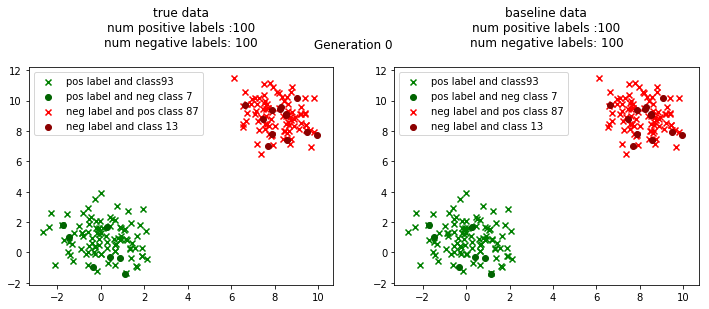

In [7]:
l.init_data()
l.plot_generation()

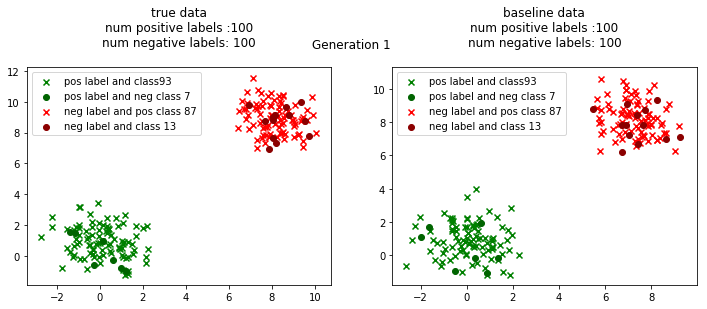

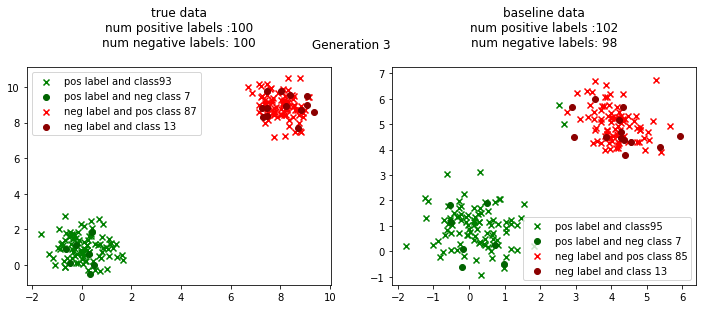

D:\Programme\Anaconda\envs\aif360\lib\site-packages\aif360\metrics\classification_metric.py:264: RuntimeWarning: invalid value encountered in double_scalars
  TPR=TP / P, TNR=TN / N, FPR=FP / N, FNR=FN / P,
D:\Programme\Anaconda\envs\aif360\lib\site-packages\aif360\metrics\classification_metric.py:265: RuntimeWarning: invalid value encountered in double_scalars
  GTPR=GTP / P, GTNR=GTN / N, GFPR=GFP / N, GFNR=GFN / P,


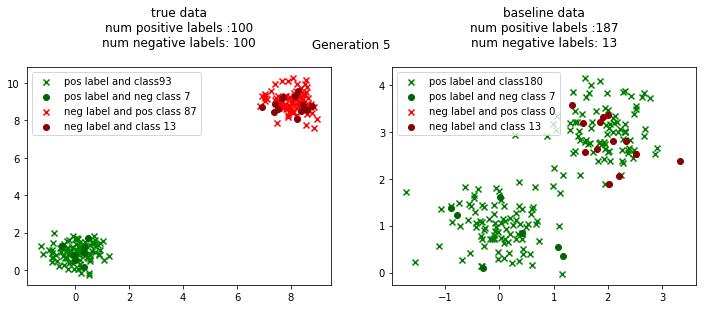

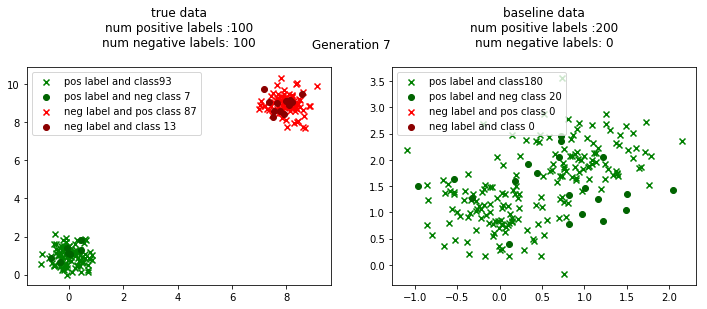

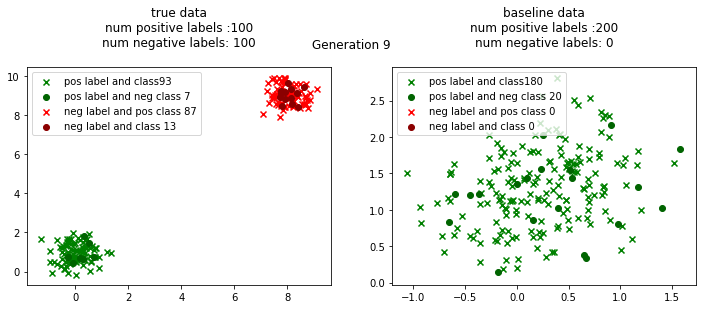

In [8]:
for i in range(10):

    l.run_generation()
    l._run_baseline_generation()
    if i % 2 == 0:
        l.plot_generation()


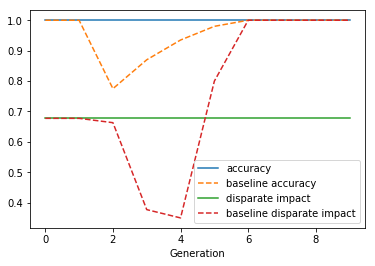

In [9]:
l.plot(["accuracy", "disparate impact"])

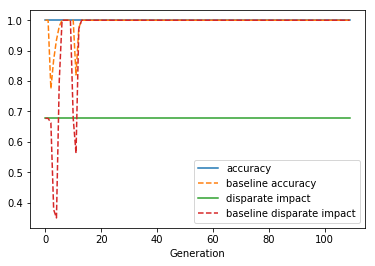

In [10]:
l.run(100)
l.plot(["accuracy", "disparate impact"])